In [1]:
machine = 'mac'
machine = 'magny'

In [2]:
from galpy.potential import NFWPotential as NFWpot
from galpy.potential import HernquistPotential as HEpot
from galpy.potential import DoubleExponentialDiskPotential as DEpot
from galpy.potential import MiyamotoNagaiPotential as MNpot
from galpy.potential import MN3ExponentialDiskPotential as MN3pot
from galpy.potential import MWPotential2014

from galpy.potential import evaluateDensities, evaluatePotentials
from galpy.potential import plotDensities
from galpy.potential import plotRotcurve
from galpy.util import bovy_conversion

import numpy as np
from scipy import optimize as opt

from astropy import units

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind
import calcGrid

from auriga_basics import *
from auriga_functions import *

import datetime

cmap = copy.copy(plt.cm.inferno)
%matplotlib inline

In [3]:
#### path = /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/*
level = 4
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
     

level   : 4
halo    : 24
snapnr  : 127
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



In [4]:
mask =  np.where( (s.halo == 0) & (s.r() < 2.*s.galrad) & (s.r() > 0.) )
m_cum, m_enc, rbins_Mpc = enclosed_mass(s.mass[mask], s.r()[mask], nbins = 41) 
mask =  np.where( (s.halo == 0) & (s.r() < 2.*s.galrad) & (s.r() > 0.) )
m_cum, m_enc, rbins_Mpc = enclosed_mass(s.mass[mask], s.r()[mask], nbins = 41) 

In [5]:
iall, = np.where( (s.halo == 0) & (s.r() < 0.5 * s.galrad) & (s.r() > 0.) )

mask = iall
(x_kpc, y_kpc, z_kpc), (vx_kms, vy_kms, vz_kms), rxyz_kpc, rxy_kpc = get_cartesian_vectors(s, sf, mask)
(R_kpc, phi, z_kpc), (vR_kms, vphi, vz_kms) = get_cylindrical_vectors(s, sf, mask)


(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, mask)
(R, phi, z), (vR, vphi, vz) = get_cylindrical_vectors(s, sf, mask)

rho, Rbin, z, vol = fitting_dens(s.mass[mask][np.abs(z_kpc > -50.) & np.abs(z_kpc <50.)], R_kpc[np.abs(z_kpc > -50.) & np.abs(z_kpc <50.)], z_kpc[np.abs(z_kpc > -50.) & np.abs(z_kpc <50.)], nbins = 101)
#rho, R, z, vol = fitting_dens(s)


Mass, radius and height given as input.


/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')



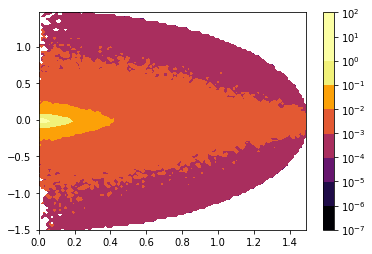

In [6]:
CS = plt.contourf(Rbin/8., z/8., rho, norm=LogNorm(vmin=1e-6, vmax=1), cmap = cmap)
cbar = plt.colorbar(CS)


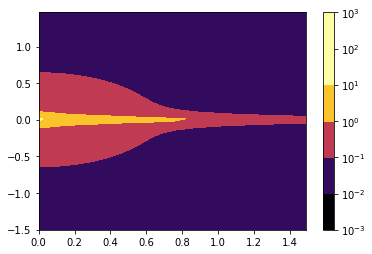

[  5.00000000e-01   3.75000000e-02   6.00000000e-01   4.50000000e+00
   4.00000000e-01   2.20000000e+02]
8.59369817872


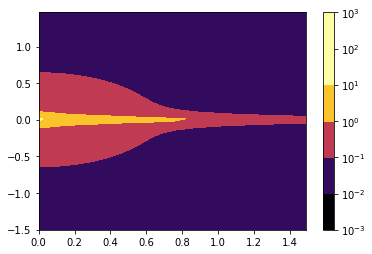

[  5.00000000e-01   3.75000000e-02   6.00000000e-01   4.50000000e+00
   4.00000000e-01   2.20000000e+02]
8.59369817872


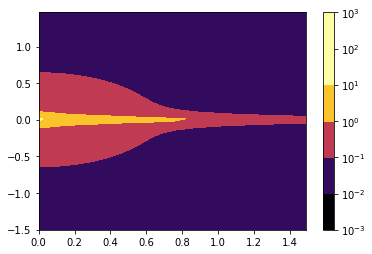

[  5.00000015e-01   3.75000000e-02   6.00000000e-01   4.50000000e+00
   4.00000000e-01   2.20000000e+02]
8.59369799512


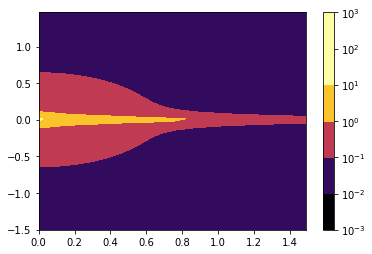

[  5.00000000e-01   3.75000149e-02   6.00000000e-01   4.50000000e+00
   4.00000000e-01   2.20000000e+02]
8.59369714483


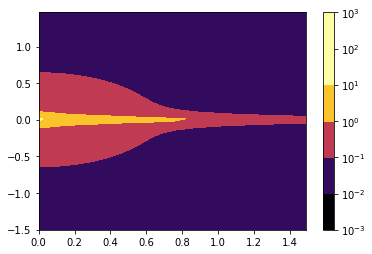

[  5.00000000e-01   3.75000000e-02   6.00000015e-01   4.50000000e+00
   4.00000000e-01   2.20000000e+02]
8.59369834781


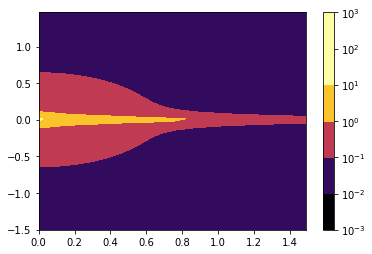

[  5.00000000e-01   3.75000000e-02   6.00000000e-01   4.50000001e+00
   4.00000000e-01   2.20000000e+02]
8.5936981774


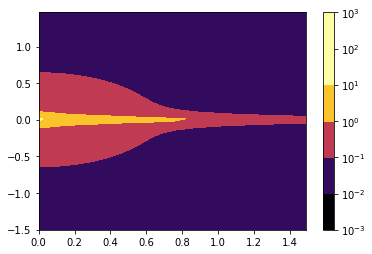

[  5.00000000e-01   3.75000000e-02   6.00000000e-01   4.50000000e+00
   4.00000015e-01   2.20000000e+02]
8.59369825785


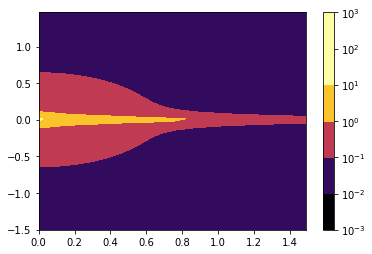

[  5.00000000e-01   3.75000000e-02   6.00000000e-01   4.50000000e+00
   4.00000000e-01   2.20000000e+02]
8.59369817993


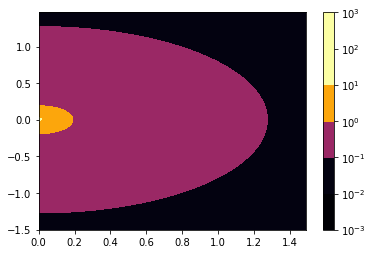

[  1.28207324e+01   6.94202459e+01   1.00000000e-03   4.58854175e+00
   9.99000000e-01   2.19918793e+02]
6.64657027336


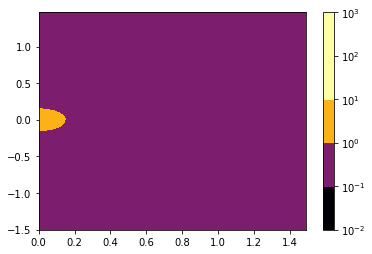

[   6.6627809    34.74247116    0.3003826     4.54428823    0.6996174
  219.95938069]
5.33115511384


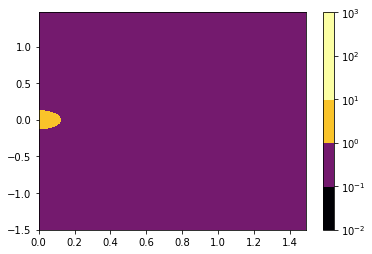

[   3.58544021   17.41279134    0.44999441    4.52217322    0.55000559
  219.97966365]
4.82369831197


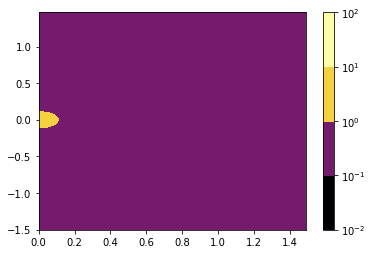

[   2.04740783    8.75154402    0.5247693     4.5111203     0.4752307
  219.98980093]
4.61394697599


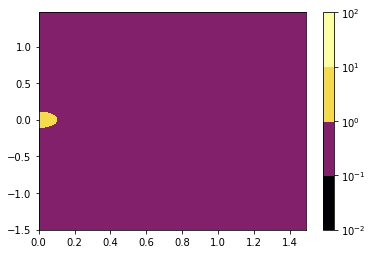

[   1.27866912    4.42248296    0.56214326    4.50559583    0.43785674
  219.99486774]
4.47005641352


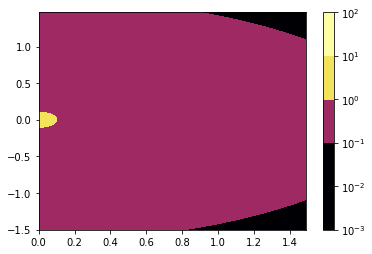

[   0.89451449    2.25916164    0.58081979    4.50283514    0.41918021
  219.99739973]
4.27443984449


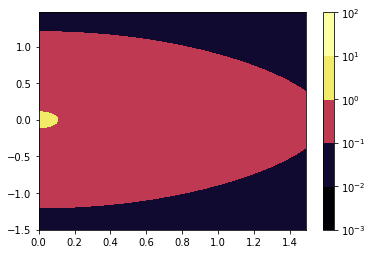

[   0.70276106    1.17932489    0.59014232    4.50145712    0.40985768
  219.99866359]
4.11571794876


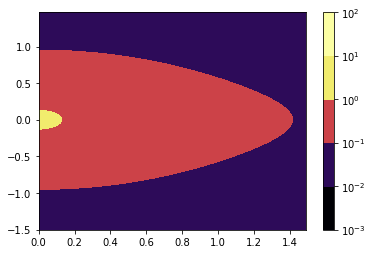

[   0.60725327    0.6414841     0.59478564    4.50077077    0.40521436
  219.99929309]
4.19907889063


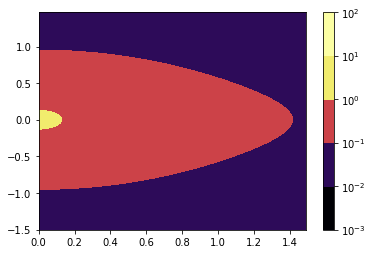

[   0.60725327    0.6414841     0.59478564    4.50077077    0.40521436
  219.99929309]
4.19907889063


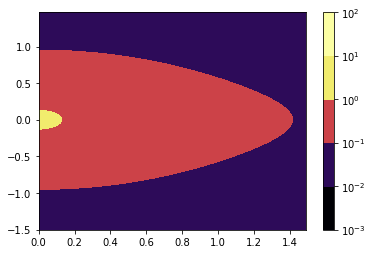

[   0.60725329    0.6414841     0.59478564    4.50077077    0.40521436
  219.99929309]
4.19907888689


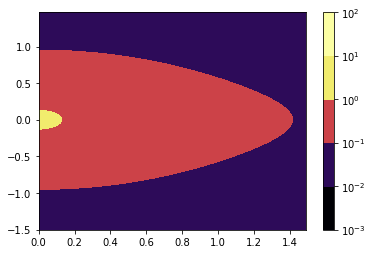

[   0.60725327    0.64148412    0.59478564    4.50077077    0.40521436
  219.99929309]
4.19907888185


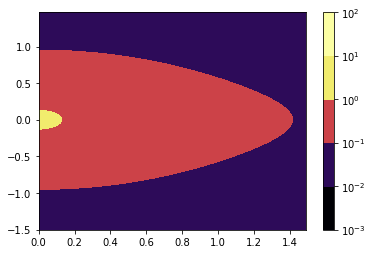

[   0.60725327    0.6414841     0.59478566    4.50077077    0.40521436
  219.99929309]
4.1990789369


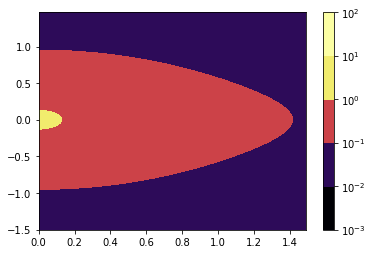

[   0.60725327    0.6414841     0.59478564    4.50077078    0.40521436
  219.99929309]
4.19907888939


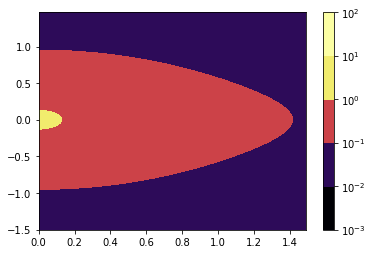

[   0.60725327    0.6414841     0.59478564    4.50077077    0.40521437
  219.99929309]
4.19907898671


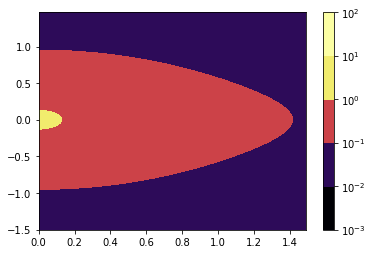

[   0.60725327    0.6414841     0.59478564    4.50077077    0.40521436
  219.9992931 ]
4.19907889124


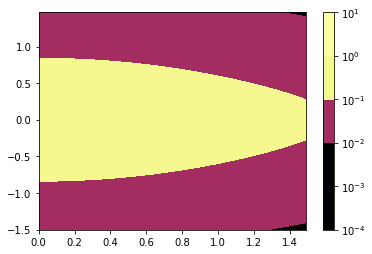

[  7.60904446e-01   6.75122014e-01   9.99000000e-01   4.58421046e+00
   1.00000000e-03   2.19959053e+02]
3.31058644999


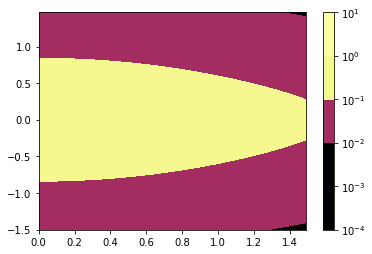

[  7.60904446e-01   6.75122014e-01   9.99000000e-01   4.58421046e+00
   1.00000000e-03   2.19959053e+02]
3.31058644999


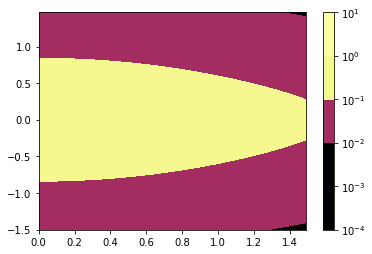

[  7.60904461e-01   6.75122014e-01   9.99000000e-01   4.58421046e+00
   1.00000000e-03   2.19959053e+02]
3.31058645377


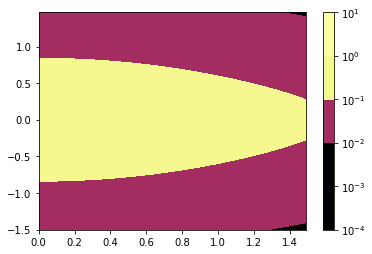

[  7.60904446e-01   6.75122028e-01   9.99000000e-01   4.58421046e+00
   1.00000000e-03   2.19959053e+02]
3.31058644453


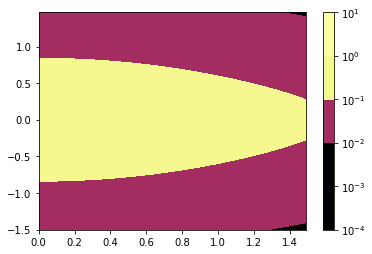

[  7.60904446e-01   6.75122014e-01   9.99000015e-01   4.58421046e+00
   1.00000000e-03   2.19959053e+02]
3.31058649985


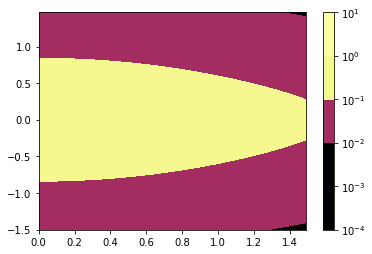

[  7.60904446e-01   6.75122014e-01   9.99000000e-01   4.58421047e+00
   1.00000000e-03   2.19959053e+02]
3.31058644999


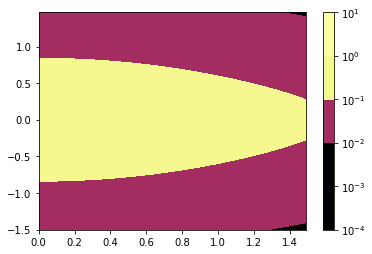

[  7.60904446e-01   6.75122014e-01   9.99000000e-01   4.58421046e+00
   1.00001490e-03   2.19959053e+02]
3.31058650809


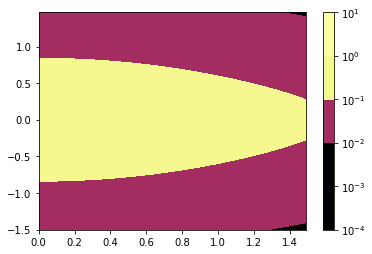

[  7.60904446e-01   6.75122014e-01   9.99000000e-01   4.58421046e+00
   1.00000000e-03   2.19959053e+02]
3.31058645045


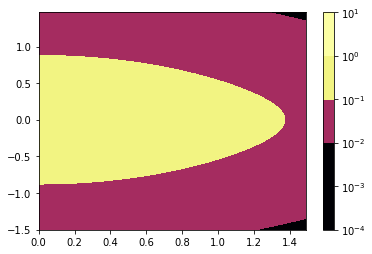

[  4.85205192e-01   7.26004582e-01   9.99000000e-01   4.58412884e+00
   1.00000000e-03   2.19932020e+02]
3.2912032788


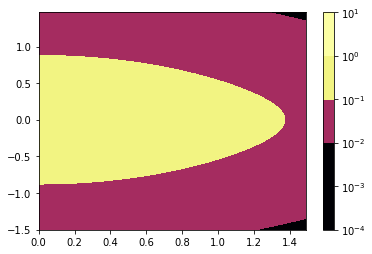

[  4.85205192e-01   7.26004582e-01   9.99000000e-01   4.58412884e+00
   1.00000000e-03   2.19932020e+02]
3.2912032788


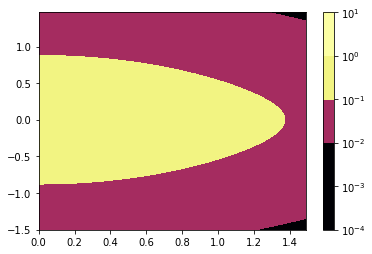

[  4.85205207e-01   7.26004582e-01   9.99000000e-01   4.58412884e+00
   1.00000000e-03   2.19932020e+02]
3.29120327311


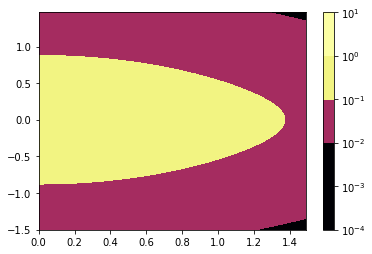

[  4.85205192e-01   7.26004597e-01   9.99000000e-01   4.58412884e+00
   1.00000000e-03   2.19932020e+02]
3.29120326735


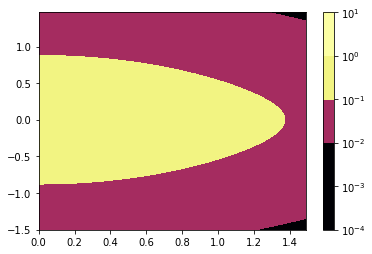

[  4.85205192e-01   7.26004582e-01   9.99000015e-01   4.58412884e+00
   1.00000000e-03   2.19932020e+02]
3.29120332847


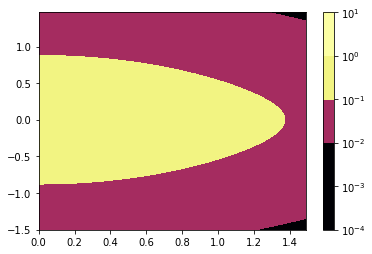

[  4.85205192e-01   7.26004582e-01   9.99000000e-01   4.58412885e+00
   1.00000000e-03   2.19932020e+02]
3.2912032788


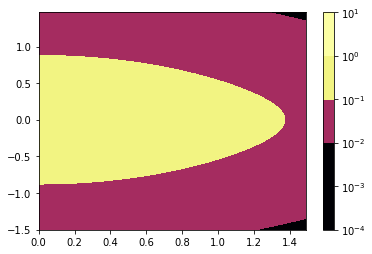

[  4.85205192e-01   7.26004582e-01   9.99000000e-01   4.58412884e+00
   1.00001490e-03   2.19932020e+02]
3.29120333914


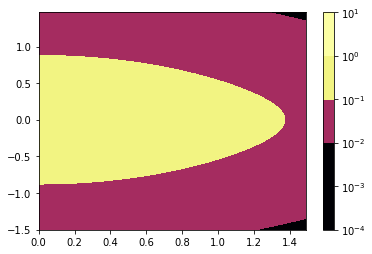

[  4.85205192e-01   7.26004582e-01   9.99000000e-01   4.58412884e+00
   1.00000000e-03   2.19932020e+02]
3.29120327926


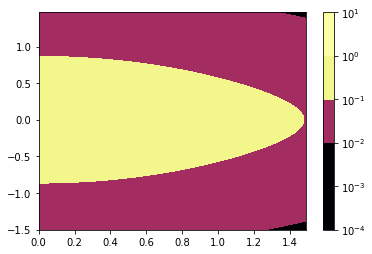

[  5.97818768e-01   7.10805911e-01   9.99000000e-01   4.58514254e+00
   1.00000000e-03   2.19911525e+02]
3.27632155268


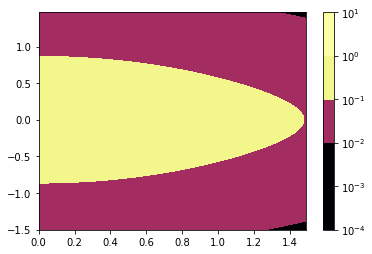

[  5.97818768e-01   7.10805911e-01   9.99000000e-01   4.58514254e+00
   1.00000000e-03   2.19911525e+02]
3.27632155268


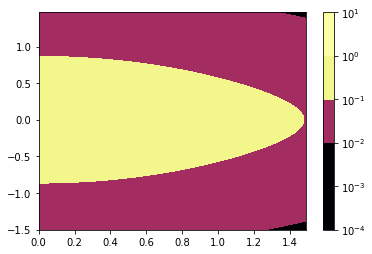

[  5.97818783e-01   7.10805911e-01   9.99000000e-01   4.58514254e+00
   1.00000000e-03   2.19911525e+02]
3.27632155178


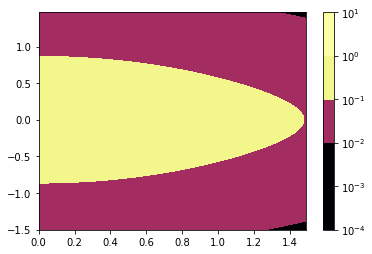

[  5.97818768e-01   7.10805926e-01   9.99000000e-01   4.58514254e+00
   1.00000000e-03   2.19911525e+02]
3.27632154478


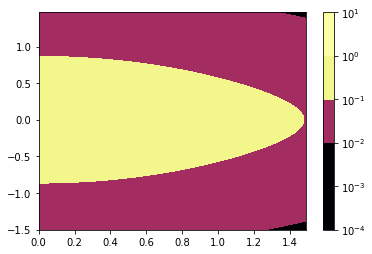

[  5.97818768e-01   7.10805911e-01   9.99000015e-01   4.58514254e+00
   1.00000000e-03   2.19911525e+02]
3.27632160206


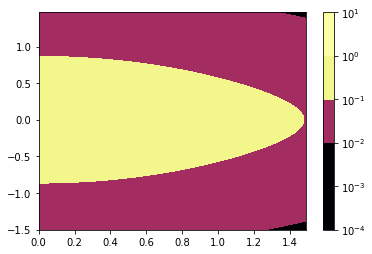

[  5.97818768e-01   7.10805911e-01   9.99000000e-01   4.58514255e+00
   1.00000000e-03   2.19911525e+02]
3.27632155268


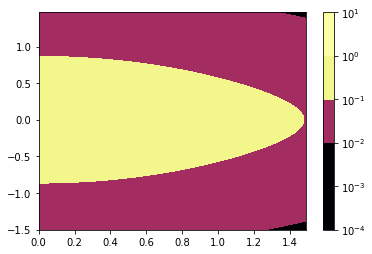

[  5.97818768e-01   7.10805911e-01   9.99000000e-01   4.58514254e+00
   1.00001490e-03   2.19911525e+02]
3.27632161189


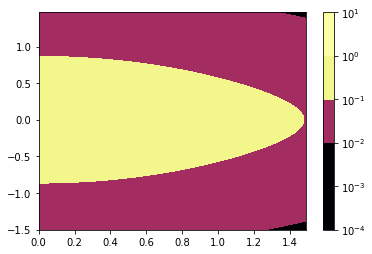

[  5.97818768e-01   7.10805911e-01   9.99000000e-01   4.58514254e+00
   1.00000000e-03   2.19911525e+02]
3.27632155313


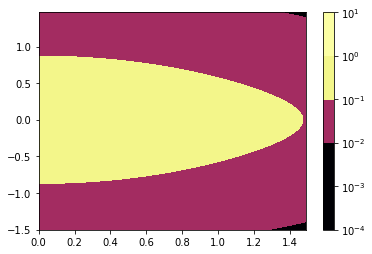

[  5.90356830e-01   7.18078395e-01   9.99000000e-01   4.58619343e+00
   1.00000000e-03   2.19875759e+02]
3.27188570628


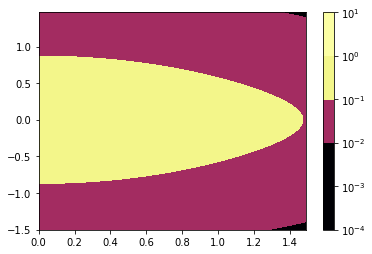

[  5.90356830e-01   7.18078395e-01   9.99000000e-01   4.58619343e+00
   1.00000000e-03   2.19875759e+02]
3.27188570628


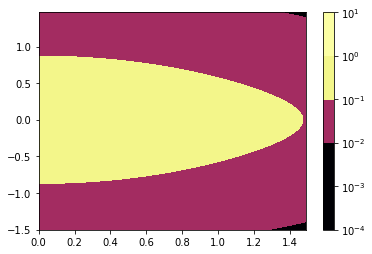

[  5.90356845e-01   7.18078395e-01   9.99000000e-01   4.58619343e+00
   1.00000000e-03   2.19875759e+02]
3.27188570532


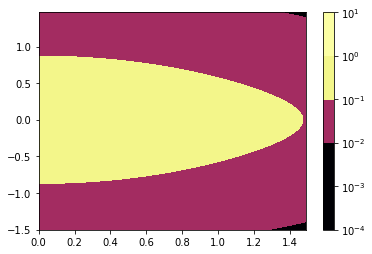

[  5.90356830e-01   7.18078410e-01   9.99000000e-01   4.58619343e+00
   1.00000000e-03   2.19875759e+02]
3.27188569851


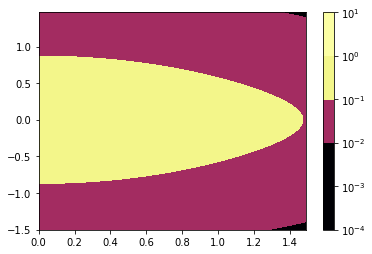

[  5.90356830e-01   7.18078395e-01   9.99000015e-01   4.58619343e+00
   1.00000000e-03   2.19875759e+02]
3.27188575559


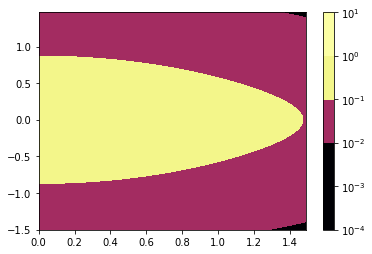

[  5.90356830e-01   7.18078395e-01   9.99000000e-01   4.58619344e+00
   1.00000000e-03   2.19875759e+02]
3.27188570628


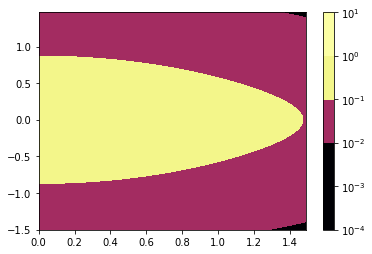

[  5.90356830e-01   7.18078395e-01   9.99000000e-01   4.58619343e+00
   1.00001490e-03   2.19875759e+02]
3.27188576544


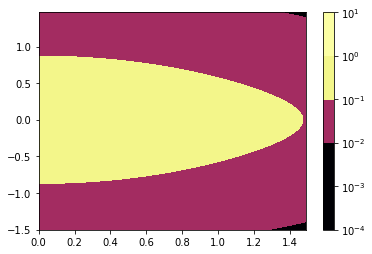

[  5.90356830e-01   7.18078395e-01   9.99000000e-01   4.58619343e+00
   1.00000000e-03   2.19875759e+02]
3.27188570673


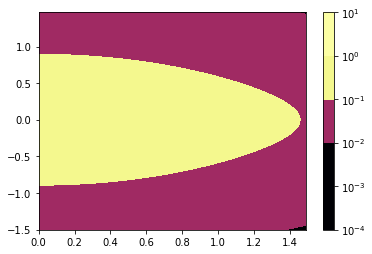

[  5.64682907e-01   7.52496148e-01   9.99000000e-01   4.59152076e+00
   1.00000000e-03   2.19693448e+02]
3.25108012102


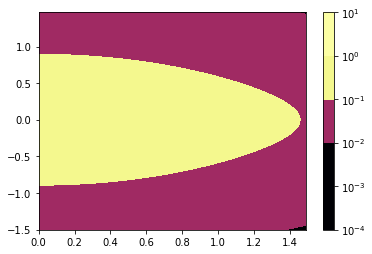

[  5.64682907e-01   7.52496148e-01   9.99000000e-01   4.59152076e+00
   1.00000000e-03   2.19693448e+02]
3.25108012102


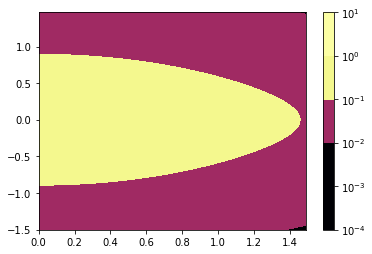

[  5.64682922e-01   7.52496148e-01   9.99000000e-01   4.59152076e+00
   1.00000000e-03   2.19693448e+02]
3.25108012012


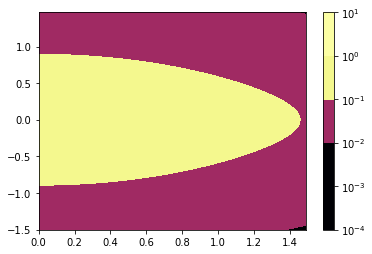

[  5.64682907e-01   7.52496163e-01   9.99000000e-01   4.59152076e+00
   1.00000000e-03   2.19693448e+02]
3.2510801141


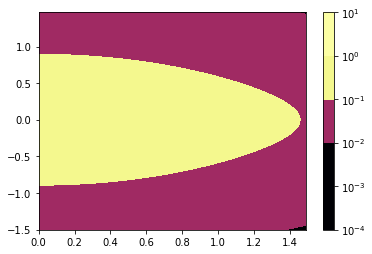

[  5.64682907e-01   7.52496148e-01   9.99000015e-01   4.59152076e+00
   1.00000000e-03   2.19693448e+02]
3.25108016998


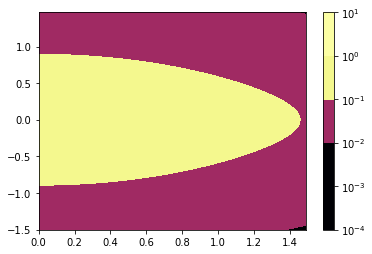

[  5.64682907e-01   7.52496148e-01   9.99000000e-01   4.59152077e+00
   1.00000000e-03   2.19693448e+02]
3.25108012102


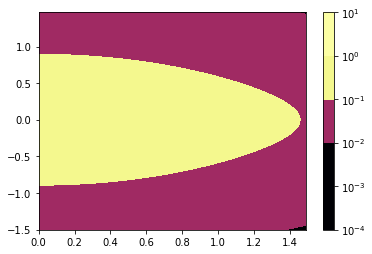

[  5.64682907e-01   7.52496148e-01   9.99000000e-01   4.59152076e+00
   1.00001490e-03   2.19693448e+02]
3.25108017978


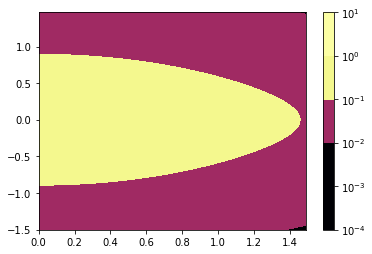

[  5.64682907e-01   7.52496148e-01   9.99000000e-01   4.59152076e+00
   1.00000000e-03   2.19693448e+02]
3.25108012147


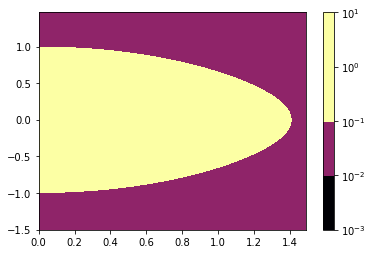

[  4.53976793e-01   9.08393405e-01   9.99000000e-01   4.61599521e+00
   1.00000000e-03   2.18845820e+02]
3.17519080719


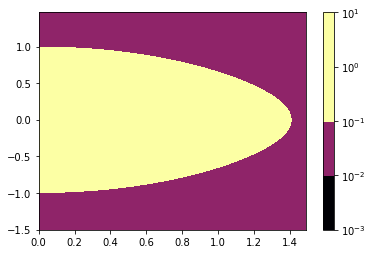

[  4.53976793e-01   9.08393405e-01   9.99000000e-01   4.61599521e+00
   1.00000000e-03   2.18845820e+02]
3.17519080719


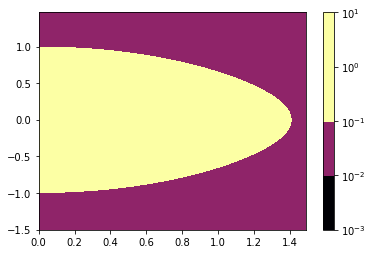

[  4.53976808e-01   9.08393405e-01   9.99000000e-01   4.61599521e+00
   1.00000000e-03   2.18845820e+02]
3.17519080685


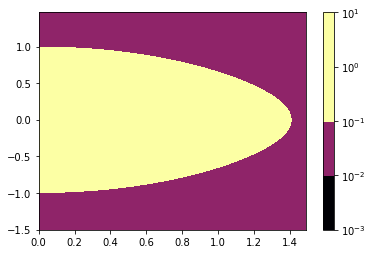

[  4.53976793e-01   9.08393420e-01   9.99000000e-01   4.61599521e+00
   1.00000000e-03   2.18845820e+02]
3.17519080326


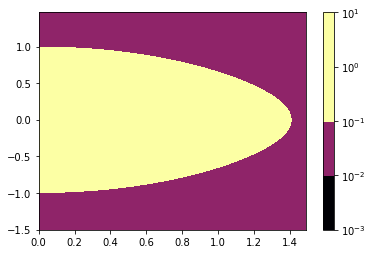

[  4.53976793e-01   9.08393405e-01   9.99000015e-01   4.61599521e+00
   1.00000000e-03   2.18845820e+02]
3.17519085486


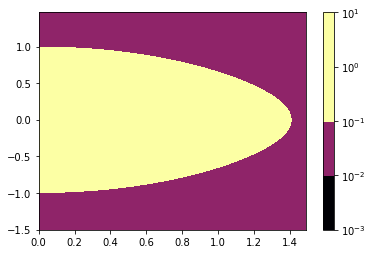

[  4.53976793e-01   9.08393405e-01   9.99000000e-01   4.61599522e+00
   1.00000000e-03   2.18845820e+02]
3.17519080719


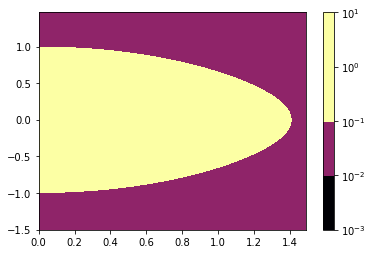

[  4.53976793e-01   9.08393405e-01   9.99000000e-01   4.61599521e+00
   1.00001490e-03   2.18845820e+02]
3.17519086411


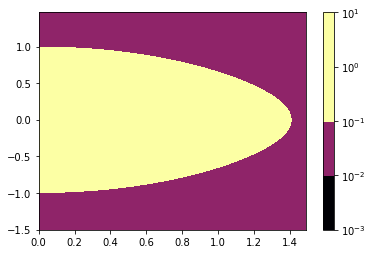

[  4.53976793e-01   9.08393405e-01   9.99000000e-01   4.61599521e+00
   1.00000000e-03   2.18845820e+02]
3.17519080763


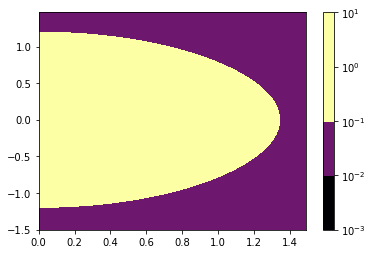

[  1.87112344e-01   1.26829758e+00   9.99000000e-01   4.67247631e+00
   1.00000000e-03   2.16862955e+02]
3.06550223026


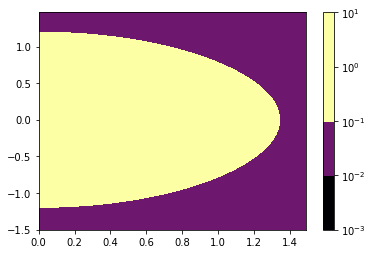

[  1.87112344e-01   1.26829758e+00   9.99000000e-01   4.67247631e+00
   1.00000000e-03   2.16862955e+02]
3.06550223026


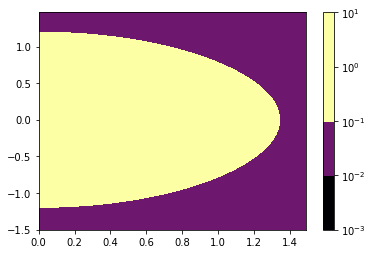

[  1.87112359e-01   1.26829758e+00   9.99000000e-01   4.67247631e+00
   1.00000000e-03   2.16862955e+02]
3.06550223087


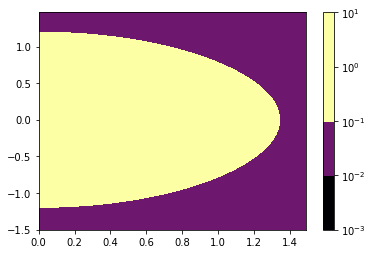

[  1.87112344e-01   1.26829760e+00   9.99000000e-01   4.67247631e+00
   1.00000000e-03   2.16862955e+02]
3.06550222954


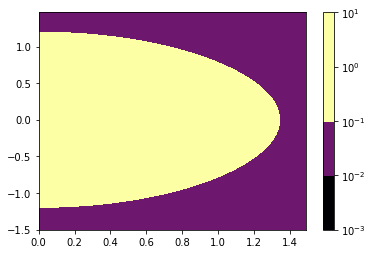

[  1.87112344e-01   1.26829758e+00   9.99000015e-01   4.67247631e+00
   1.00000000e-03   2.16862955e+02]
3.06550227605


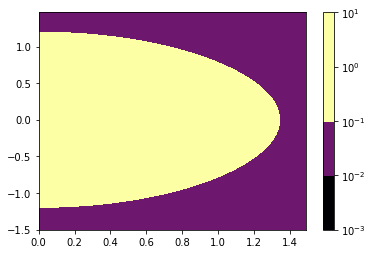

[  1.87112344e-01   1.26829758e+00   9.99000000e-01   4.67247632e+00
   1.00000000e-03   2.16862955e+02]
3.06550223026


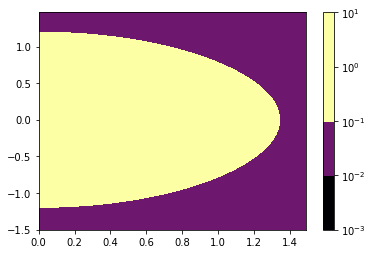

[  1.87112344e-01   1.26829758e+00   9.99000000e-01   4.67247631e+00
   1.00001490e-03   2.16862955e+02]
3.0655022832


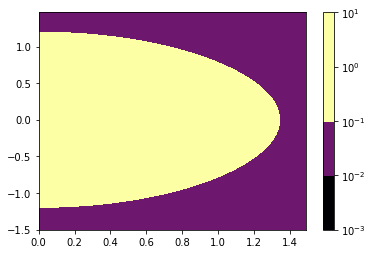

[  1.87112344e-01   1.26829758e+00   9.99000000e-01   4.67247631e+00
   1.00000000e-03   2.16862955e+02]
3.06550223068


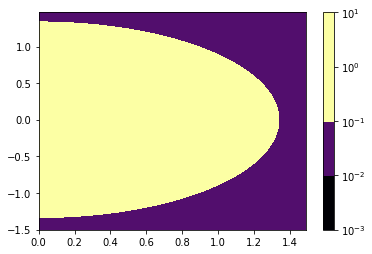

[  1.00000000e-03   1.54732047e+00   9.99000000e-01   4.71730861e+00
   1.00000000e-03   2.15266777e+02]
3.00784085042


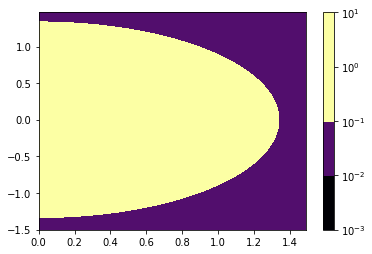

[  1.00000000e-03   1.54732047e+00   9.99000000e-01   4.71730861e+00
   1.00000000e-03   2.15266777e+02]
3.00784085042


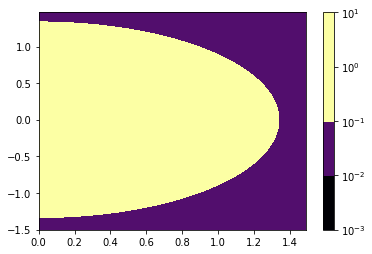

[  1.00001490e-03   1.54732047e+00   9.99000000e-01   4.71730861e+00
   1.00000000e-03   2.15266777e+02]
3.00784085214


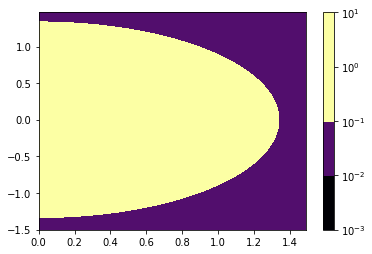

[  1.00000000e-03   1.54732049e+00   9.99000000e-01   4.71730861e+00
   1.00000000e-03   2.15266777e+02]
3.00784085123


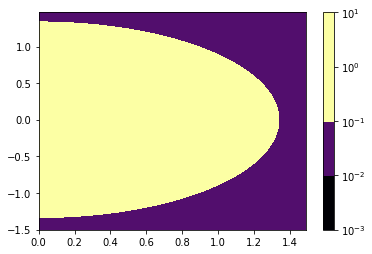

[  1.00000000e-03   1.54732047e+00   9.99000015e-01   4.71730861e+00
   1.00000000e-03   2.15266777e+02]
3.00784089521


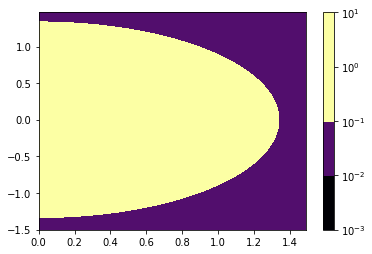

[  1.00000000e-03   1.54732047e+00   9.99000000e-01   4.71730862e+00
   1.00000000e-03   2.15266777e+02]
3.00784085042


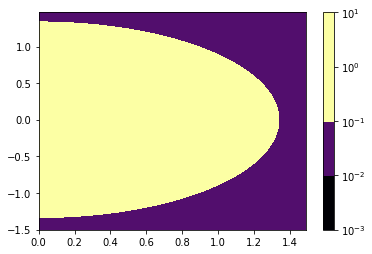

[  1.00000000e-03   1.54732047e+00   9.99000000e-01   4.71730861e+00
   1.00001490e-03   2.15266777e+02]
3.00784090042


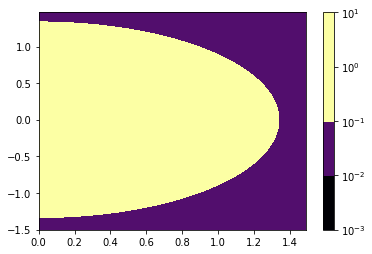

[  1.00000000e-03   1.54732047e+00   9.99000000e-01   4.71730861e+00
   1.00000000e-03   2.15266777e+02]
3.00784085084


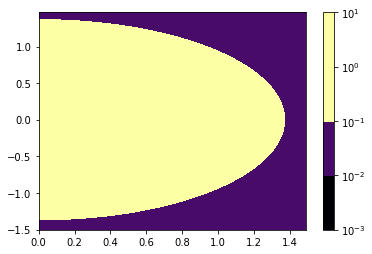

[  1.00000000e-03   1.61003850e+00   9.99000000e-01   4.72918892e+00
   1.00000000e-03   2.14821700e+02]
3.00071496923


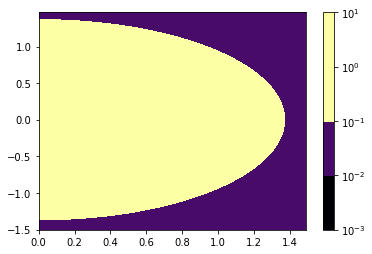

[  1.00000000e-03   1.61003850e+00   9.99000000e-01   4.72918892e+00
   1.00000000e-03   2.14821700e+02]
3.00071496923


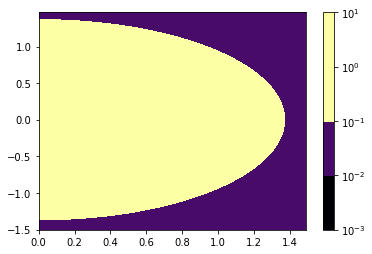

[  1.00001490e-03   1.61003850e+00   9.99000000e-01   4.72918892e+00
   1.00000000e-03   2.14821700e+02]
3.00071497192


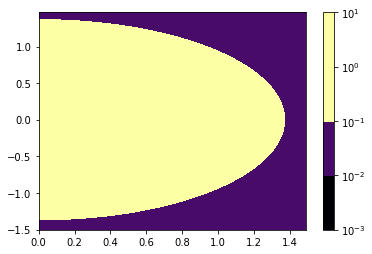

[  1.00000000e-03   1.61003851e+00   9.99000000e-01   4.72918892e+00
   1.00000000e-03   2.14821700e+02]
3.00071497091


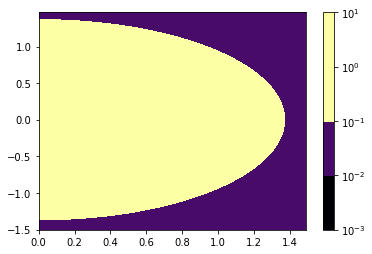

[  1.00000000e-03   1.61003850e+00   9.99000015e-01   4.72918892e+00
   1.00000000e-03   2.14821700e+02]
3.00071501387


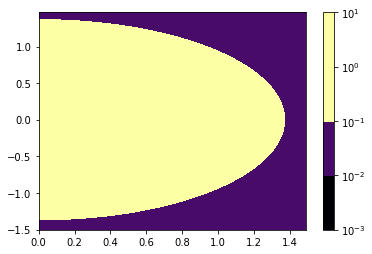

[  1.00000000e-03   1.61003850e+00   9.99000000e-01   4.72918893e+00
   1.00000000e-03   2.14821700e+02]
3.00071496923


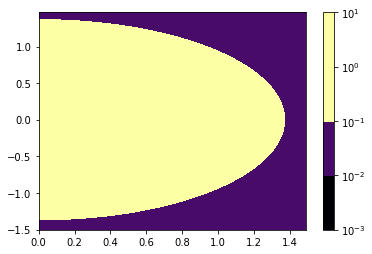

[  1.00000000e-03   1.61003850e+00   9.99000000e-01   4.72918892e+00
   1.00001490e-03   2.14821700e+02]
3.00071501828


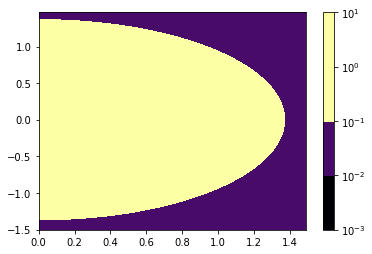

[  1.00000000e-03   1.61003850e+00   9.99000000e-01   4.72918892e+00
   1.00000000e-03   2.14821700e+02]
3.00071496965


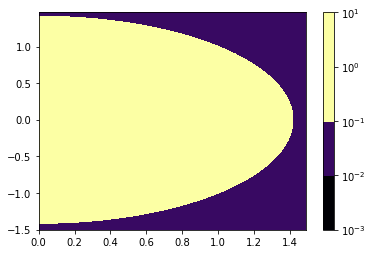

[  1.00000000e-03   1.70037427e+00   9.99000000e-01   4.74670812e+00
   1.00000000e-03   2.14136340e+02]
2.994857989


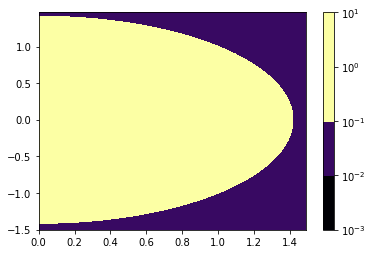

[  1.00000000e-03   1.70037427e+00   9.99000000e-01   4.74670812e+00
   1.00000000e-03   2.14136340e+02]
2.994857989


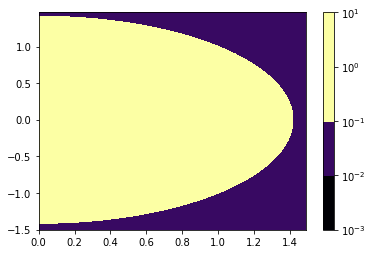

[  1.00001490e-03   1.70037427e+00   9.99000000e-01   4.74670812e+00
   1.00000000e-03   2.14136340e+02]
2.99485799279


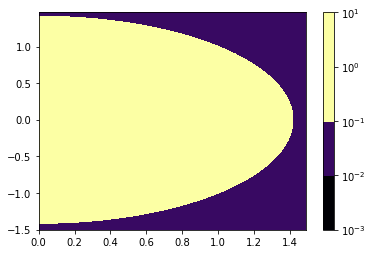

[  1.00000000e-03   1.70037429e+00   9.99000000e-01   4.74670812e+00
   1.00000000e-03   2.14136340e+02]
2.99485799164


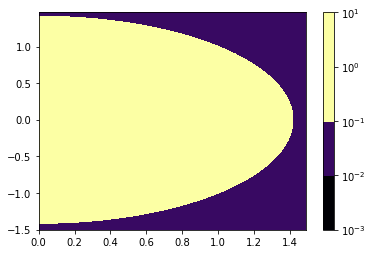

[  1.00000000e-03   1.70037427e+00   9.99000015e-01   4.74670812e+00
   1.00000000e-03   2.14136340e+02]
2.9948580335


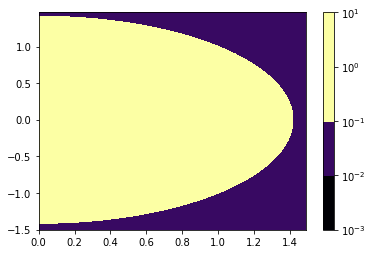

[  1.00000000e-03   1.70037427e+00   9.99000000e-01   4.74670814e+00
   1.00000000e-03   2.14136340e+02]
2.994857989


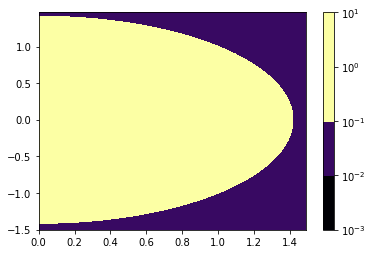

[  1.00000000e-03   1.70037427e+00   9.99000000e-01   4.74670812e+00
   1.00001490e-03   2.14136340e+02]
2.99485803674


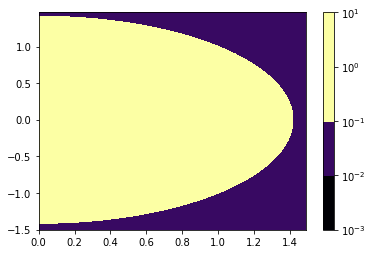

[  1.00000000e-03   1.70037427e+00   9.99000000e-01   4.74670812e+00
   1.00000000e-03   2.14136340e+02]
2.99485798941


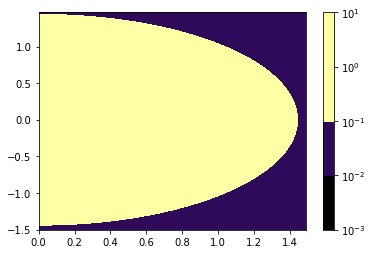

[  1.00000000e-03   1.74873455e+00   9.99000000e-01   4.75655980e+00
   1.00000000e-03   2.13717922e+02]
2.99240907897


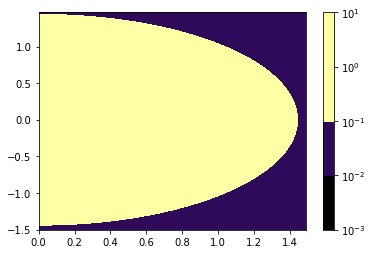

[  1.00000000e-03   1.74873455e+00   9.99000000e-01   4.75655980e+00
   1.00000000e-03   2.13717922e+02]
2.99240907897


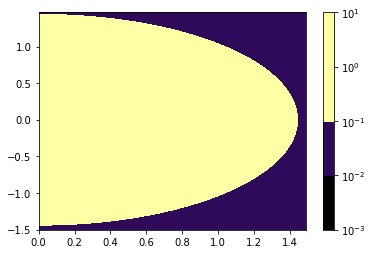

[  1.00001490e-03   1.74873455e+00   9.99000000e-01   4.75655980e+00
   1.00000000e-03   2.13717922e+02]
2.99240908323


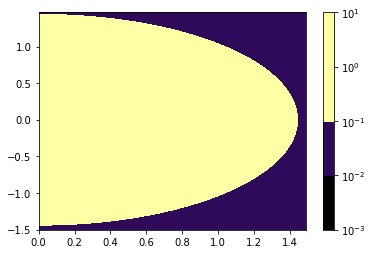

[  1.00000000e-03   1.74873456e+00   9.99000000e-01   4.75655980e+00
   1.00000000e-03   2.13717922e+02]
2.99240908201


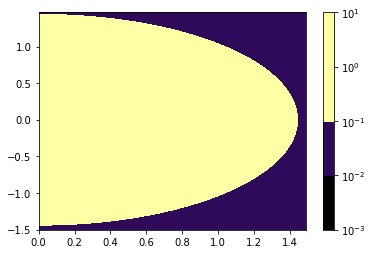

[  1.00000000e-03   1.74873455e+00   9.99000015e-01   4.75655980e+00
   1.00000000e-03   2.13717922e+02]
2.99240912342


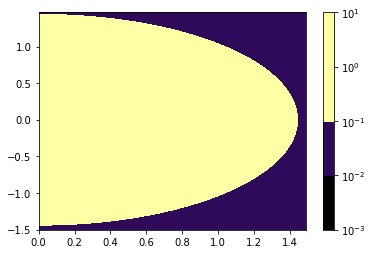

[  1.00000000e-03   1.74873455e+00   9.99000000e-01   4.75655981e+00
   1.00000000e-03   2.13717922e+02]
2.99240907897


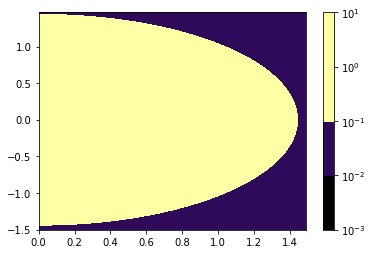

[  1.00000000e-03   1.74873455e+00   9.99000000e-01   4.75655980e+00
   1.00001490e-03   2.13717922e+02]
2.99240912603


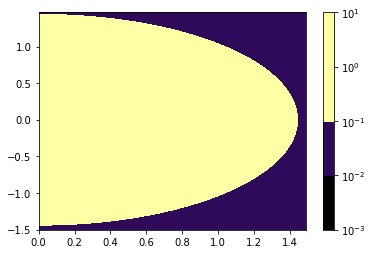

[  1.00000000e-03   1.74873455e+00   9.99000000e-01   4.75655980e+00
   1.00000000e-03   2.13717922e+02]
2.99240907939


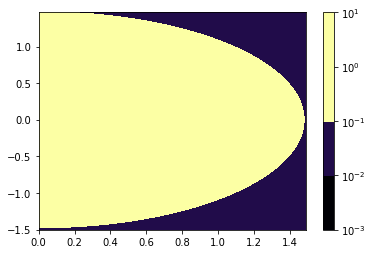

[  1.00000000e-03   1.81870883e+00   9.99000000e-01   4.77169550e+00
   1.00000000e-03   2.13016433e+02]
2.98816298329


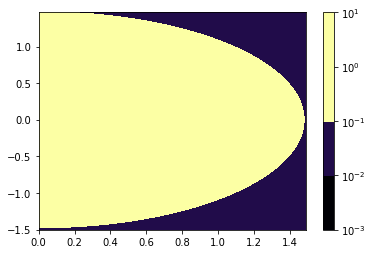

[  1.00000000e-03   1.81870883e+00   9.99000000e-01   4.77169550e+00
   1.00000000e-03   2.13016433e+02]
2.98816298329


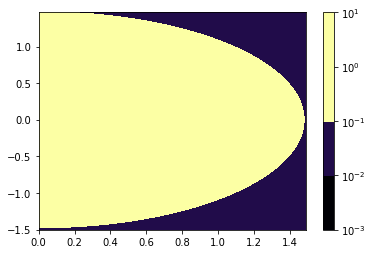

[  1.00001490e-03   1.81870883e+00   9.99000000e-01   4.77169550e+00
   1.00000000e-03   2.13016433e+02]
2.9881629881


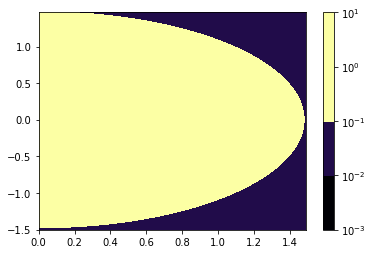

[  1.00000000e-03   1.81870885e+00   9.99000000e-01   4.77169550e+00
   1.00000000e-03   2.13016433e+02]
2.98816298677


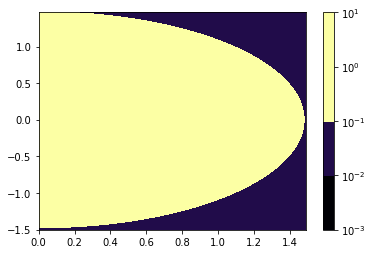

[  1.00000000e-03   1.81870883e+00   9.99000015e-01   4.77169550e+00
   1.00000000e-03   2.13016433e+02]
2.98816302764


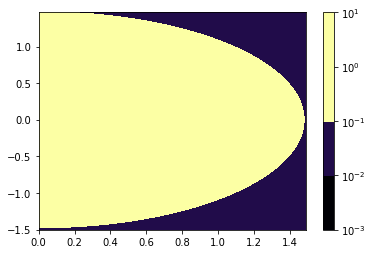

[  1.00000000e-03   1.81870883e+00   9.99000000e-01   4.77169552e+00
   1.00000000e-03   2.13016433e+02]
2.98816298329


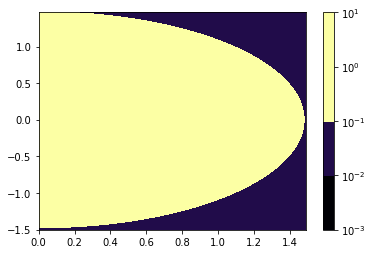

[  1.00000000e-03   1.81870883e+00   9.99000000e-01   4.77169550e+00
   1.00001490e-03   2.13016433e+02]
2.98816302935


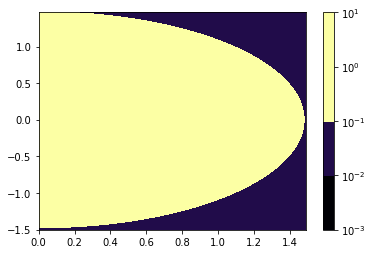

[  1.00000000e-03   1.81870883e+00   9.99000000e-01   4.77169550e+00
   1.00000000e-03   2.13016433e+02]
2.98816298371


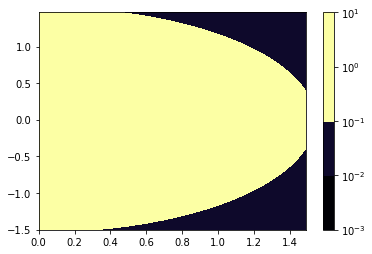

[  1.00000000e-03   1.92883008e+00   9.99000000e-01   4.79728681e+00
   1.00000000e-03   2.11719175e+02]
2.97947560496


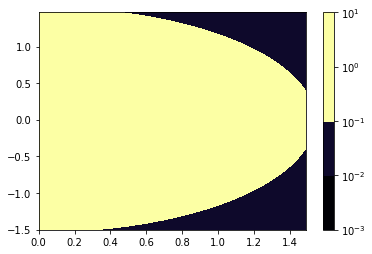

[  1.00000000e-03   1.92883008e+00   9.99000000e-01   4.79728681e+00
   1.00000000e-03   2.11719175e+02]
2.97947560496


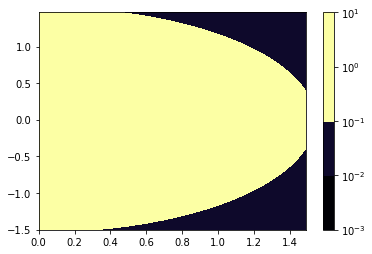

[  1.00001490e-03   1.92883008e+00   9.99000000e-01   4.79728681e+00
   1.00000000e-03   2.11719175e+02]
2.97947561039


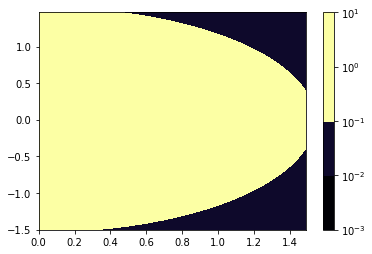

[  1.00000000e-03   1.92883010e+00   9.99000000e-01   4.79728681e+00
   1.00000000e-03   2.11719175e+02]
2.97947560891


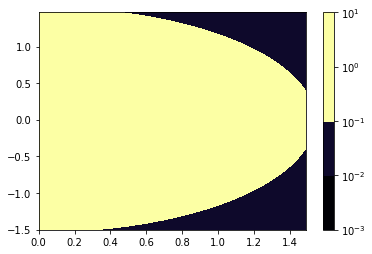

[  1.00000000e-03   1.92883008e+00   9.99000015e-01   4.79728681e+00
   1.00000000e-03   2.11719175e+02]
2.97947564913


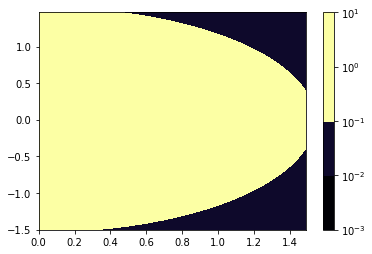

[  1.00000000e-03   1.92883008e+00   9.99000000e-01   4.79728683e+00
   1.00000000e-03   2.11719175e+02]
2.97947560496


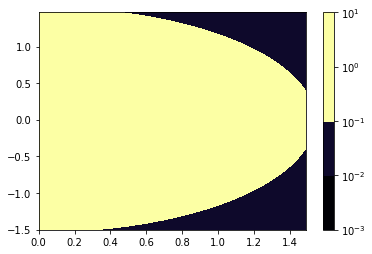

[  1.00000000e-03   1.92883008e+00   9.99000000e-01   4.79728681e+00
   1.00001490e-03   2.11719175e+02]
2.97947564945


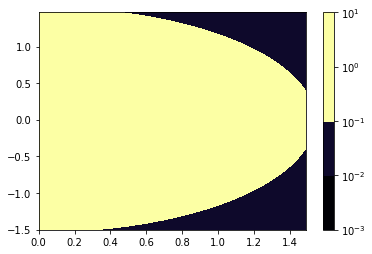

[  1.00000000e-03   1.92883008e+00   9.99000000e-01   4.79728681e+00
   1.00000000e-03   2.11719175e+02]
2.97947560538


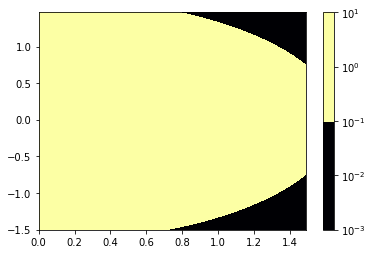

[  1.00000000e-03   2.16288840e+00   9.99000000e-01   4.85532391e+00
   1.00000000e-03   2.08564005e+02]
2.9565629285


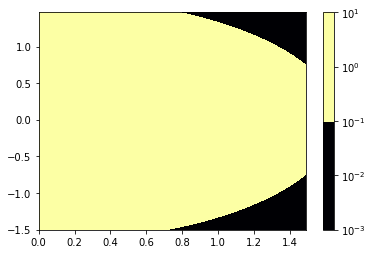

[  1.00000000e-03   2.16288840e+00   9.99000000e-01   4.85532391e+00
   1.00000000e-03   2.08564005e+02]
2.9565629285


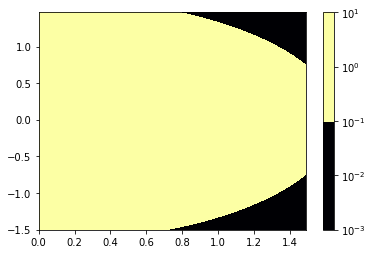

[  1.00001490e-03   2.16288840e+00   9.99000000e-01   4.85532391e+00
   1.00000000e-03   2.08564005e+02]
2.95656293454


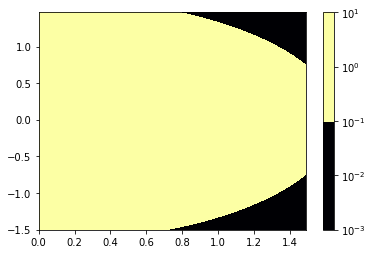

[  1.00000000e-03   2.16288842e+00   9.99000000e-01   4.85532391e+00
   1.00000000e-03   2.08564005e+02]
2.9565629328


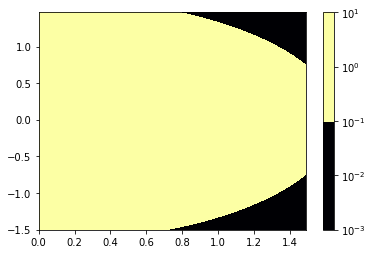

[  1.00000000e-03   2.16288840e+00   9.99000015e-01   4.85532391e+00
   1.00000000e-03   2.08564005e+02]
2.95656297223


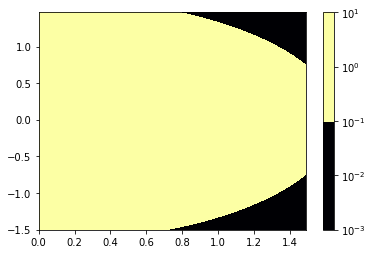

[  1.00000000e-03   2.16288840e+00   9.99000000e-01   4.85532392e+00
   1.00000000e-03   2.08564005e+02]
2.9565629285


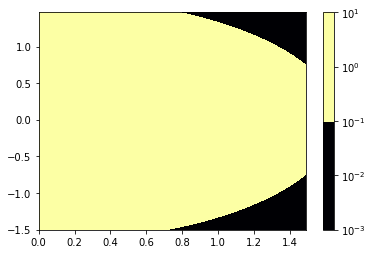

[  1.00000000e-03   2.16288840e+00   9.99000000e-01   4.85532391e+00
   1.00001490e-03   2.08564005e+02]
2.95656296983


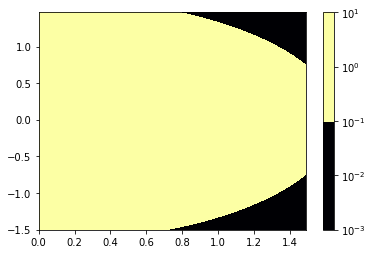

[  1.00000000e-03   2.16288840e+00   9.99000000e-01   4.85532391e+00
   1.00000000e-03   2.08564005e+02]
2.95656292892


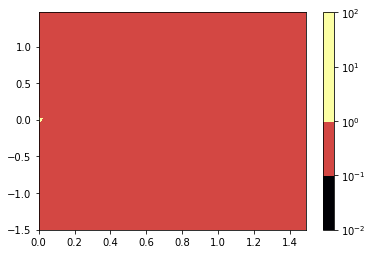

[  1.00000000e-03   3.76132643e+00   9.17800820e-01   5.25060486e+00
   8.21991800e-02   1.87335082e+02]
2.65887441144


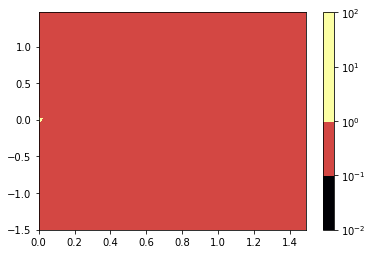

[  1.00000000e-03   3.76132643e+00   9.17800820e-01   5.25060486e+00
   8.21991800e-02   1.87335082e+02]
2.65887441144


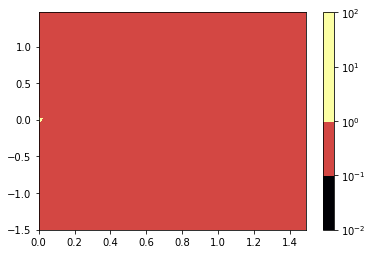

[  1.00001490e-03   3.76132643e+00   9.17800820e-01   5.25060486e+00
   8.21991800e-02   1.87335082e+02]
2.65887441522


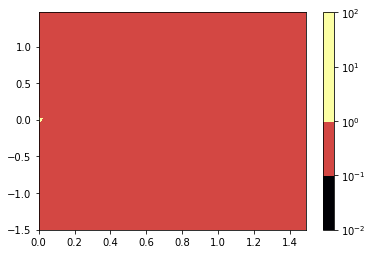

[  1.00000000e-03   3.76132644e+00   9.17800820e-01   5.25060486e+00
   8.21991800e-02   1.87335082e+02]
2.65887441321


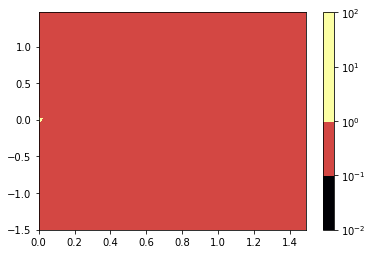

[  1.00000000e-03   3.76132643e+00   9.17800835e-01   5.25060486e+00
   8.21991800e-02   1.87335082e+02]
2.65887445148


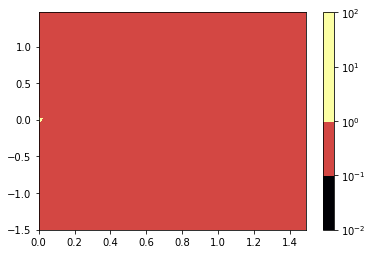

[  1.00000000e-03   3.76132643e+00   9.17800820e-01   5.25060488e+00
   8.21991800e-02   1.87335082e+02]
2.65887441145


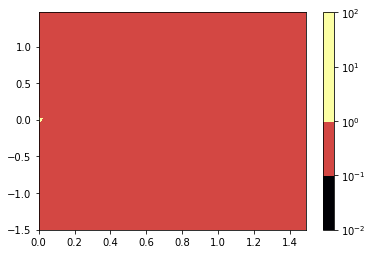

[  1.00000000e-03   3.76132643e+00   9.17800820e-01   5.25060486e+00
   8.21991949e-02   1.87335082e+02]
2.65887444759


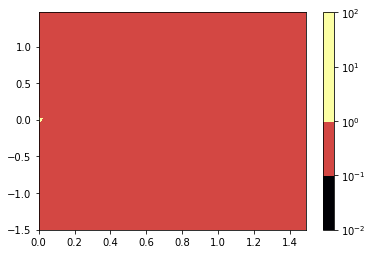

[  1.00000000e-03   3.76132643e+00   9.17800820e-01   5.25060486e+00
   8.21991800e-02   1.87335082e+02]
2.65887441186


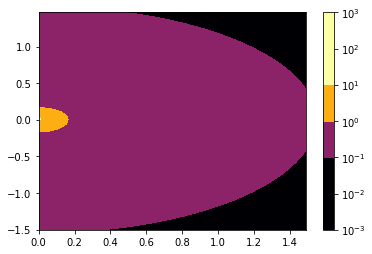

[  1.00000000e-03   1.81942553e+01   9.32505731e-02   8.78025164e+00
   9.06749427e-01   1.00000000e-03]
0.525003097968


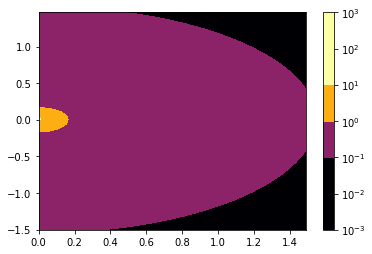

[  1.00000000e-03   1.81942553e+01   9.32505731e-02   8.78025164e+00
   9.06749427e-01   1.00000000e-03]
0.525003097968


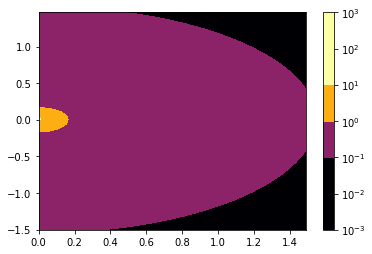

[  1.00001490e-03   1.81942553e+01   9.32505731e-02   8.78025164e+00
   9.06749427e-01   1.00000000e-03]
0.525003097968


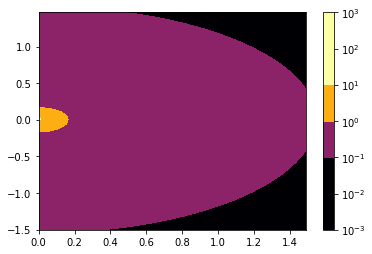

[  1.00000000e-03   1.81942554e+01   9.32505731e-02   8.78025164e+00
   9.06749427e-01   1.00000000e-03]
0.525003097968


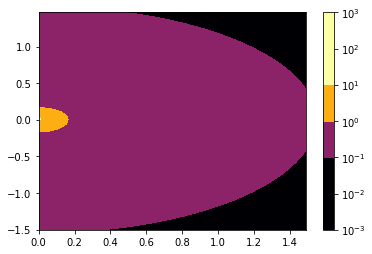

[  1.00000000e-03   1.81942553e+01   9.32505880e-02   8.78025164e+00
   9.06749427e-01   1.00000000e-03]
0.525003097968


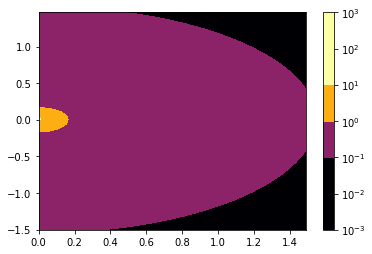

[  1.00000000e-03   1.81942553e+01   9.32505731e-02   8.78025165e+00
   9.06749427e-01   1.00000000e-03]
0.525003097968


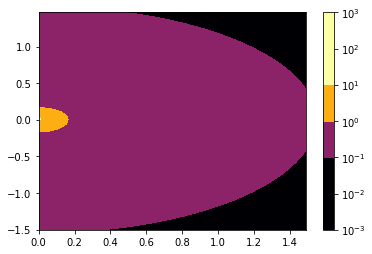

[  1.00000000e-03   1.81942553e+01   9.32505731e-02   8.78025164e+00
   9.06749442e-01   1.00000000e-03]
0.525003097968


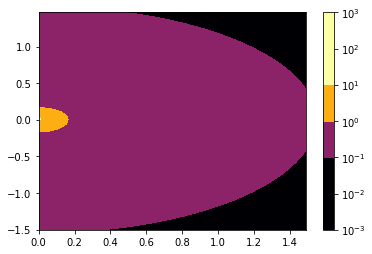

[  1.00000000e-03   1.81942553e+01   9.32505731e-02   8.78025164e+00
   9.06749427e-01   1.00001490e-03]
0.525003097968


In [7]:
def galpy_fitting(a_mp, b_mp, n_mp, a_nfw, n_nfw, v0,\
                  R = None, z = None, r0 = None):    #a_he, n_he,
    
    # stell sicher dass n_mp + n_nfw + n_he = 1, zb mit 
    #n_he = 1. - (n_mp + n_nfw)
    mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp)
    nfwp = NFWpot(a = a_nfw, normalize = n_nfw)
    #hep = HEpot(a = a_he, normalize = n_he)
    
    pot = [mp, nfwp]#, hep]
    densi = np.zeros([len(z), len(R)])
    for ii, zjj in enumerate(z):
        for jj, Rii in enumerate(R):
            densi[ii, jj] = evaluateDensities(pot, Rii/r0, zjj/r0) #* bovy_conversion.dens_in_msolpc3(v0,r0) * 10.
    
    CS = plt.contourf(R/r0, z/r0, densi, norm=LogNorm(vmin=np.min(densi), vmax=np.max(densi)), cmap= cmap)
    cbar = plt.colorbar(CS)
    plt.show()
    return densi



def RMS(x, R, z, N, rho, r0):
    a_mp, b_mp, n_mp, a_nfw, n_nfw, v0 = x[0], x[1], x[2], x[3], x[4], x[5]#, x[6], x[7] a_he, n_he
    ydata = rho
    ymodel = galpy_fitting(a_mp, b_mp, n_mp, a_nfw, n_nfw, v0, R, z, r0) * bovy_conversion.dens_in_msolpc3(v0,r0) * 10. #a_he, n_he,
    #print((ydata - ymodel)**2)    
    #print(ydata)
    #print((ydata - ymodel)**2/(ydata))
    #RMS = np.sum((ydata - ymodel)**2/(ydata))
    RMS = np.sqrt(1./N*np.sum((ydata - ymodel)**2))

    print(x)
    print(RMS)
    #print(n_mp + n_nfw)
    #print(datetime.datetime.now().time())
    return RMS

a_mp = 0.5 
b_mp = 0.0375 
n_mp = 0.6  
a_nfw = 4.5 
n_nfw = 0.4 
v0 = 220


x0 = (a_mp, b_mp, n_mp,  a_nfw , n_nfw , v0) # a_he, n_he, 

bounds = ((1e-3, None), (1e-3, None), (1e-3, 0.999), (1e-3, None), (1e-3, 0.999), (1e-3, None)) # (1e-3, None), (1e-3, 0.999),n_he

r0 = 8.
N = len(Rbin)

cons = ({'type': 'eq', 'fun': lambda x:  1. - (x[2] + x[4] )})
        
res = opt.minimize(RMS, x0 = x0, args= (Rbin, z, N, rho, r0), bounds = bounds, constraints = cons)



In [8]:
res


     fun: 0.5250030979677333
     jac: array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.71363354e-07])
 message: 'Optimization terminated successfully.'
    nfev: 151
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([  1.00000000e-03,   1.81942553e+01,   9.32505731e-02,
         8.78025164e+00,   9.06749427e-01,   1.00000000e-03])

In [9]:
a_mp, b_mp, n_mp = res.x[0], res.x[1], res.x[2]
a_nfw , n_nfw = res.x[3]  , res.x[4]
#a_he, n_he = res.x[5],  res.x[6]

In [10]:
mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp, ro = r0, vo = v0)
nfwp = NFWpot(a = a_nfw, normalize = n_nfw, ro = r0, vo = v0)
#hep = HEpot(a = a_he, normalize = 1-(n_mp+n_nfw), ro = r0, vo = v0)
    
pot = [mp,nfwp]#,hep]



In [11]:
#dens_final = galpy_fitting(a_mp, b_mp, n_mp, a_nfw , n_nfw, a_he, n_he, R= R, z= z)

/home/extmilan/anaconda3/lib/python3.6/site-packages/galpy-1.3.dev0-py3.6-linux-x86_64.egg/galpy/potential_src/TwoPowerSphericalPotential.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.a/r)**self.alpha/(1.+r/self.a)**(self.beta-self.alpha)/4./m.pi/self.a**3.

/home/extmilan/anaconda3/lib/python3.6/site-packages/numpy/core/function_base.py:128: RuntimeWarning: invalid value encountered in multiply
  y = y * step

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  wa

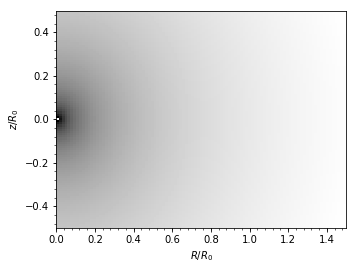

In [12]:
plotDensities(pot,nrs=101,nzs=101, log = True)

In [13]:
# Additional trials which didn't work out 

### CURVE_FIT might give problems since there are some bool args that do not need a fit. 
### Also having R and z as input values instead of just r might cause problems. 
### Think of that or first try minimize with RMS method

# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, 
# check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]

#xdata = s.r()
# check in which direction ravel goes over the arrays to calculate xdata in the irght way
'''
rho, rho_arr_real, rho_arr_mean, Rbins, zbins, volbins = dens(s)
ydata = np.ravel(rho)
xdata = np.ddzeros(len(Rbins), len(zbins))
for ii, Rii in enumerate(Rbins):
    for jj, zjj in enumerate(zbins):
        xdata[ii,jj] = np.sqrt(Rii ** 2 + zjj **2)
            
popt, pcov = opt.curve_fit(galpy_fitting, np.ravel(xdata), ydata, sigma = np.ravel(volbins), absolute_sigma = True)
'''

'\nrho, rho_arr_real, rho_arr_mean, Rbins, zbins, volbins = dens(s)\nydata = np.ravel(rho)\nxdata = np.ddzeros(len(Rbins), len(zbins))\nfor ii, Rii in enumerate(Rbins):\n    for jj, zjj in enumerate(zbins):\n        xdata[ii,jj] = np.sqrt(Rii ** 2 + zjj **2)\n            \npopt, pcov = opt.curve_fit(galpy_fitting, np.ravel(xdata), ydata, sigma = np.ravel(volbins), absolute_sigma = True)\n'